# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [1]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.7 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Overview**

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Library to encode the variables
from sklearn.preprocessing import OneHotEncoder
 # Library to split data
from sklearn.model_selection import train_test_split
# library to import different optimizers
from tensorflow.keras import optimizers
# Library to import different loss functions
from tensorflow.keras import losses
from tensorflow.keras.layers import Dense
# Library to avoid the warnings
import warnings
warnings.filterwarnings('ignore')
# importing keras library
# library to convert the target variables to numpy arrays
from tensorflow.keras.utils import to_categorical
# library to plot classification report
from sklearn.metrics import classification_report
# library to import Batch Normalization
from tensorflow.keras.layers import BatchNormalization
# Library to import Dropout
from tensorflow.keras.layers import Dropout
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.
import time  # Module for time-related operations.
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.

In [5]:
df= pd.read_csv("/content/drive/MyDrive/Python_Course/Renewable_Train.csv")

In [6]:
df_test= pd.read_csv("/content/drive/MyDrive/Python_Course/Renewable_Test.csv")

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [10]:
df.shape

(20000, 41)

In [11]:
df.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [12]:
df['Target'].value_counts(1)

,proportion
Target,
0,0.9445
1,0.0555


In [13]:
df_test['Target'].value_counts(1)

,proportion
Target,
0,0.9436
1,0.0564


In [14]:
df.dropna(subset=['V1', 'V2'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19964 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19964 non-null  float64
 1   V2      19964 non-null  float64
 2   V3      19964 non-null  float64
 3   V4      19964 non-null  float64
 4   V5      19964 non-null  float64
 5   V6      19964 non-null  float64
 6   V7      19964 non-null  float64
 7   V8      19964 non-null  float64
 8   V9      19964 non-null  float64
 9   V10     19964 non-null  float64
 10  V11     19964 non-null  float64
 11  V12     19964 non-null  float64
 12  V13     19964 non-null  float64
 13  V14     19964 non-null  float64
 14  V15     19964 non-null  float64
 15  V16     19964 non-null  float64
 16  V17     19964 non-null  float64
 17  V18     19964 non-null  float64
 18  V19     19964 non-null  float64
 19  V20     19964 non-null  float64
 20  V21     19964 non-null  float64
 21  V22     19964 non-null  float64
 22  V23

In [16]:
df.shape

(19964, 41)

# **Exploratory Data Analysis**

## Univariate analysis

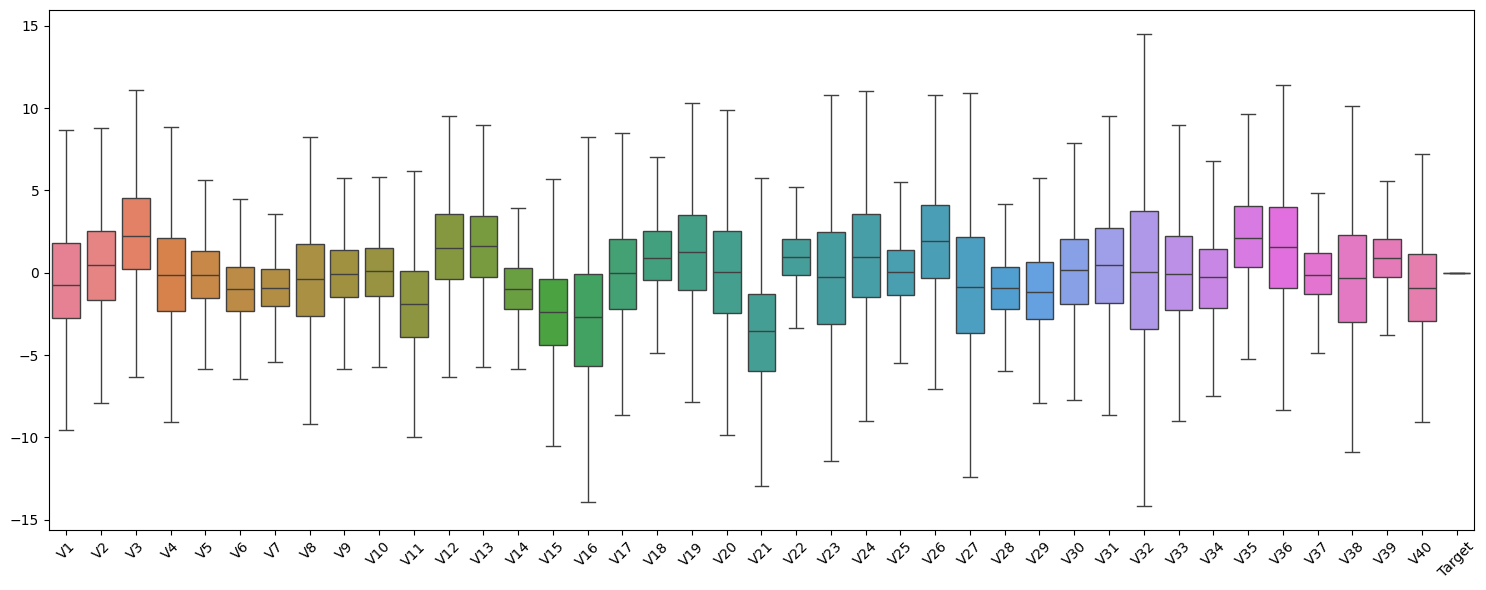

In [95]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,showfliers=False)  # Seaborn automatically handles multiple columns
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

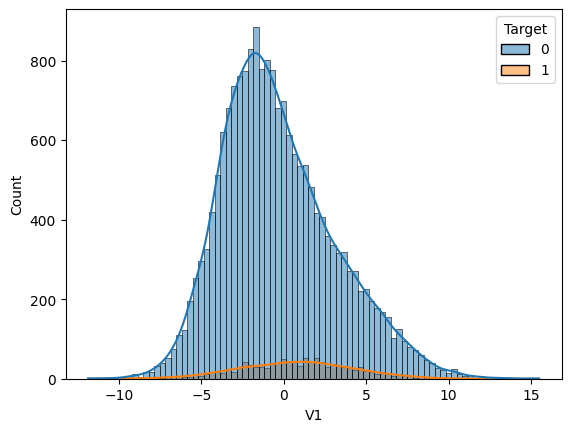

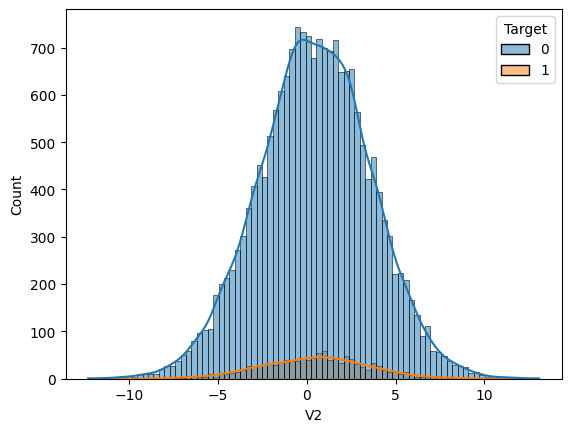

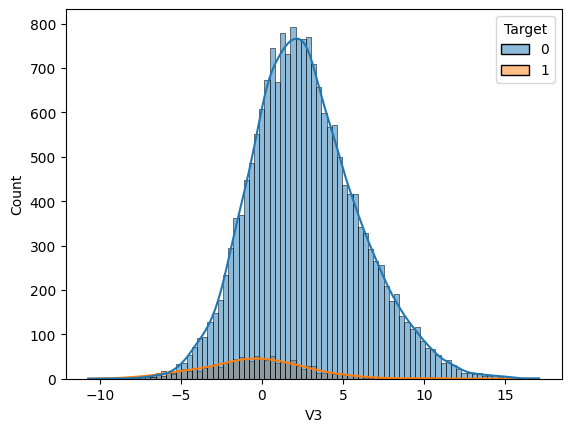

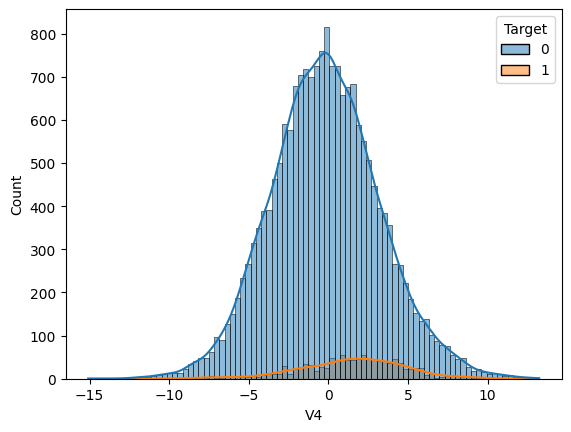

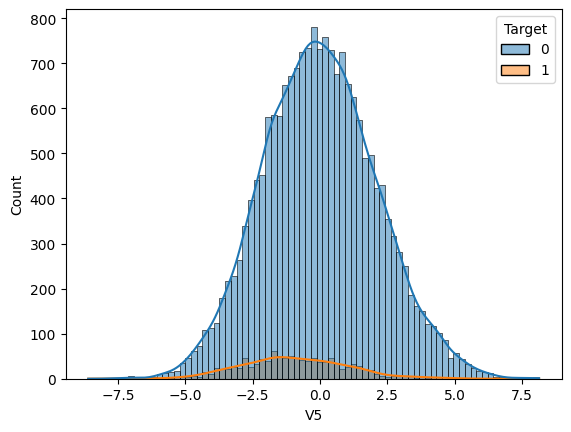

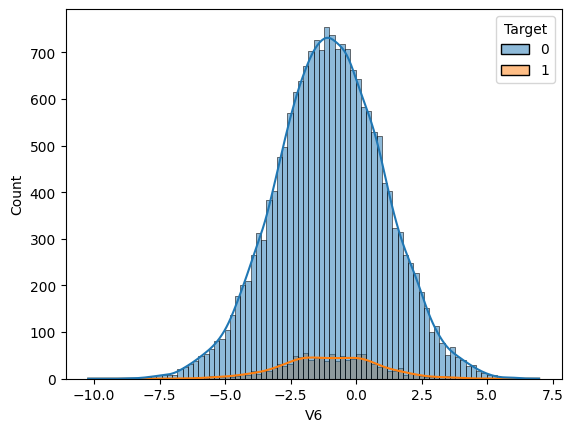

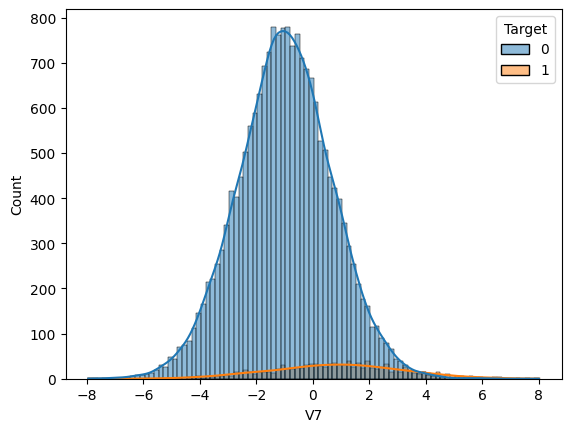

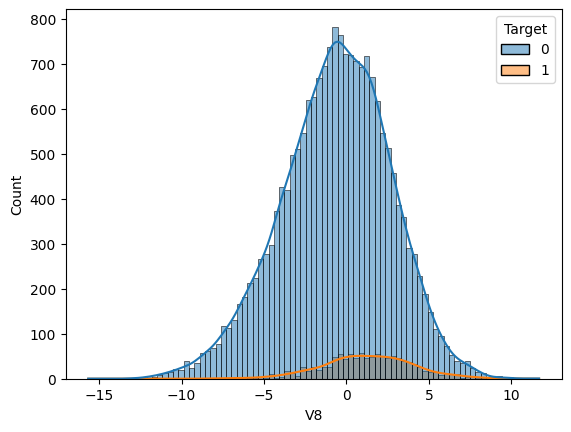

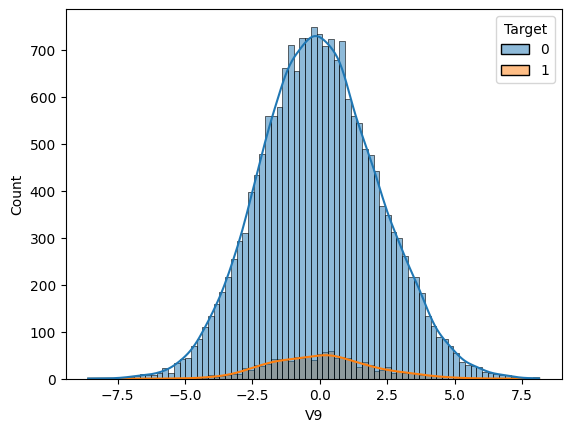

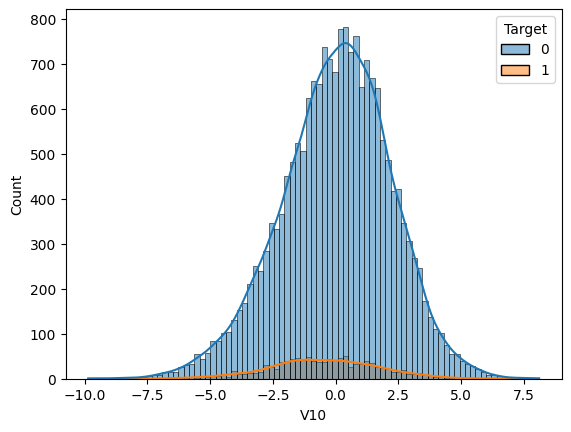

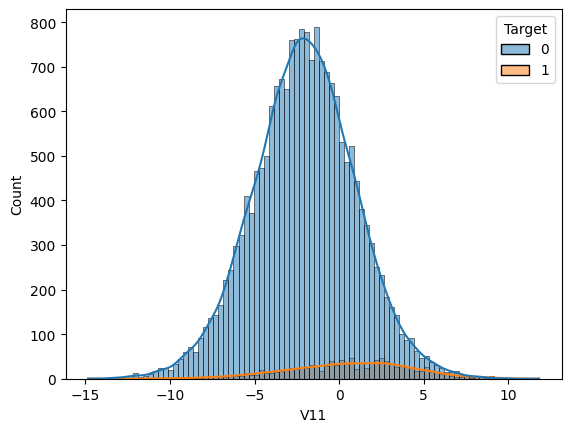

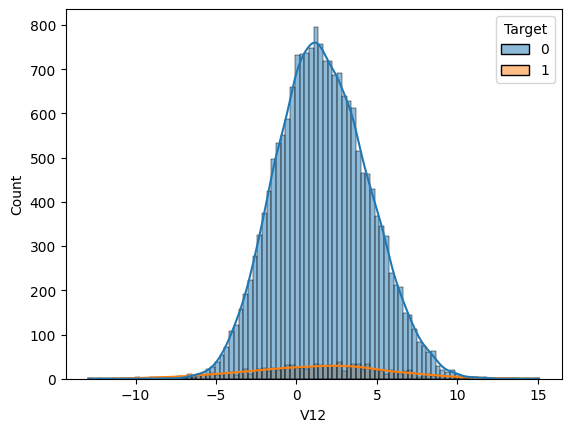

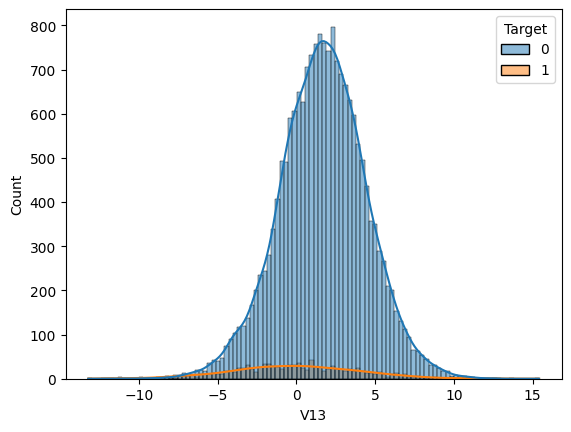

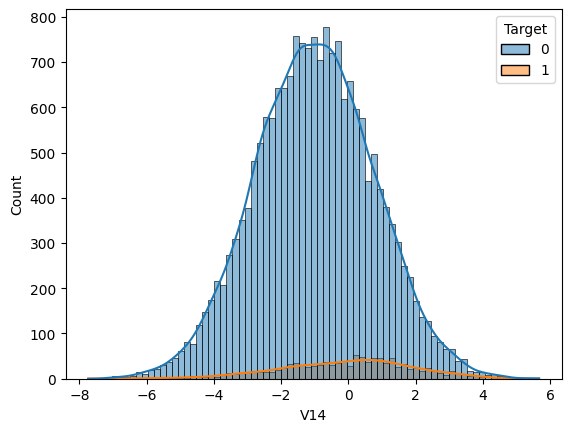

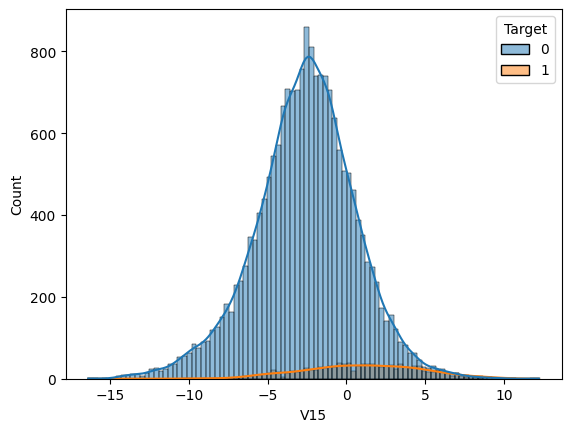

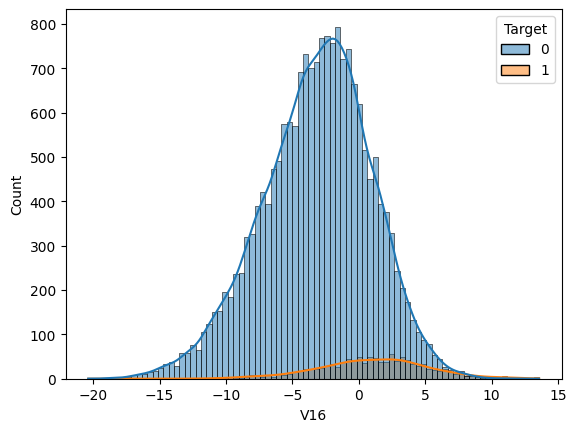

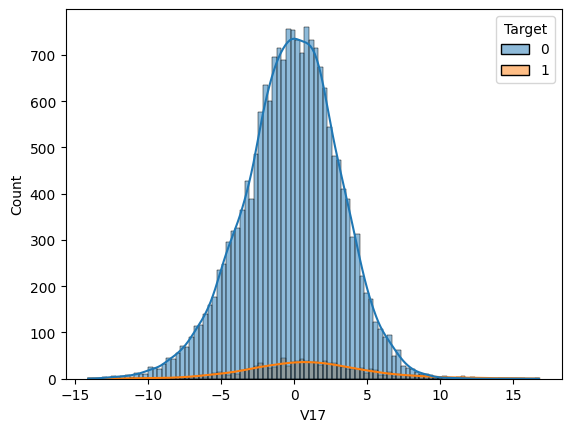

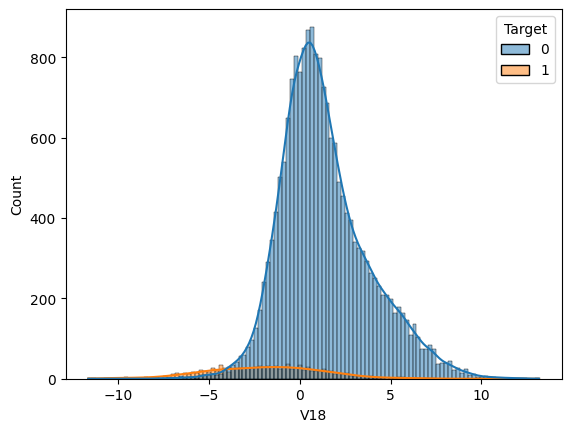

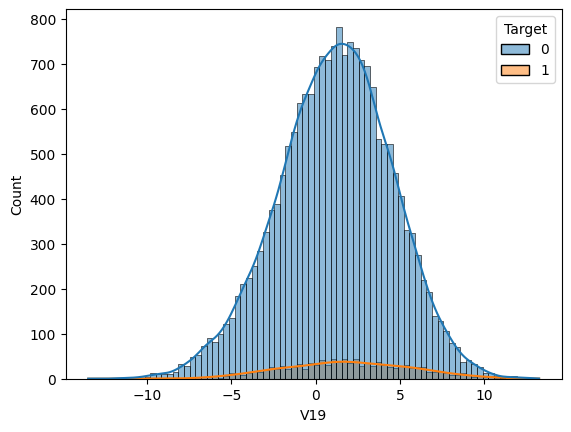

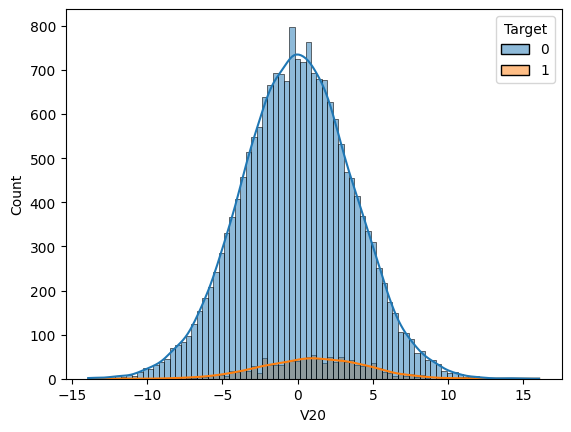

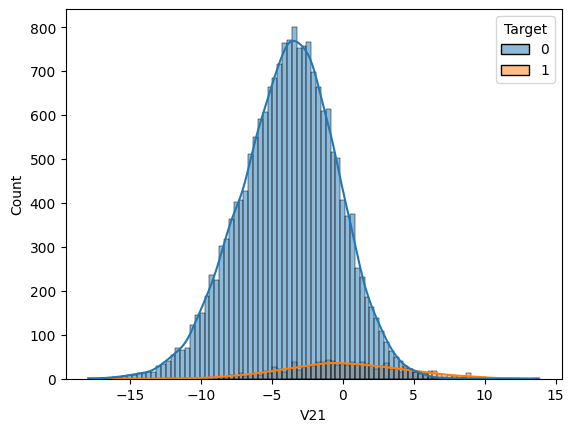

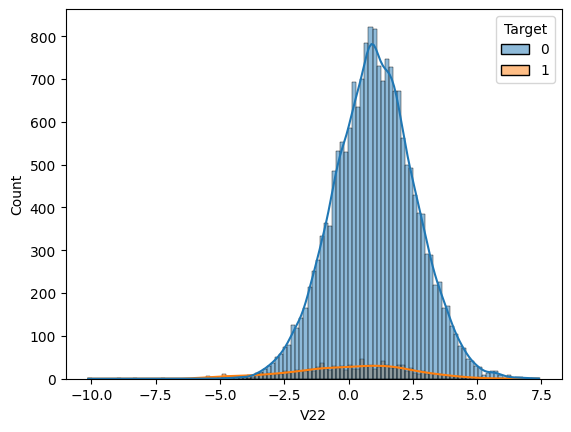

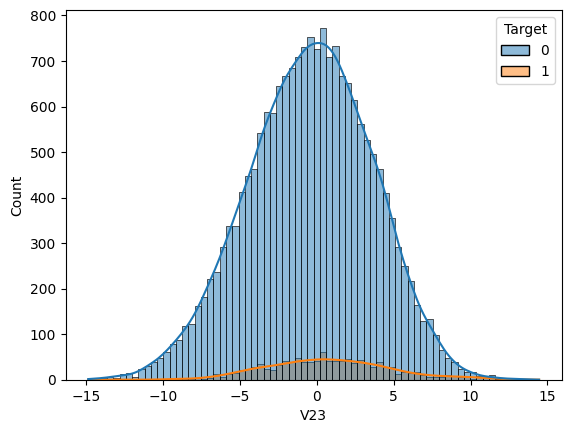

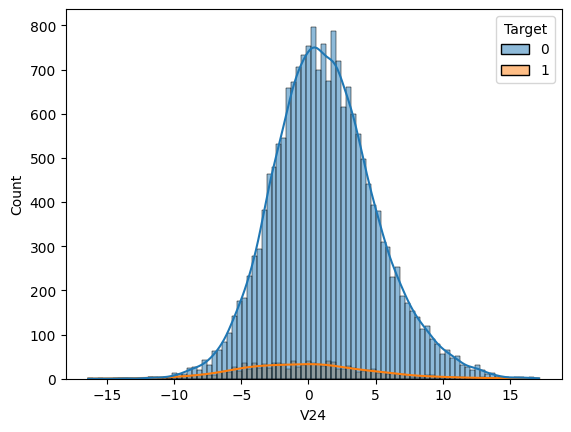

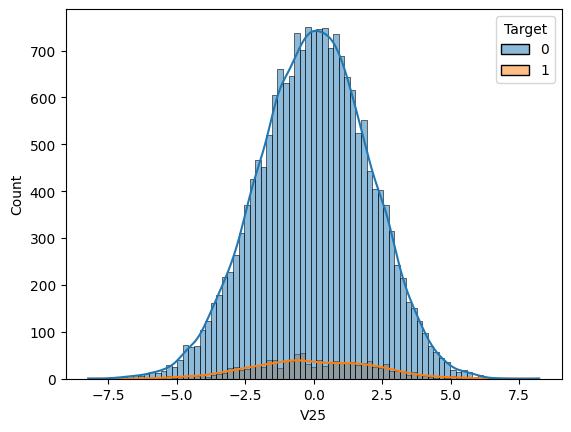

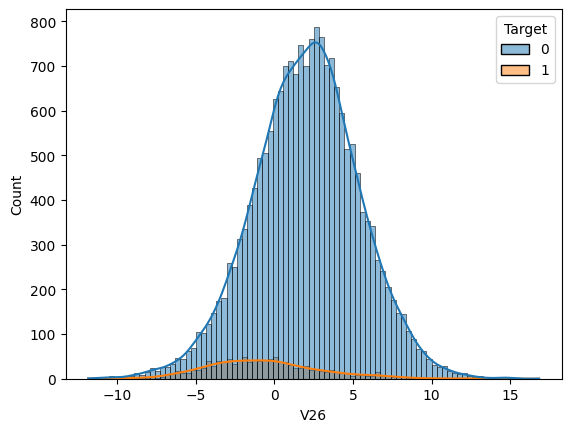

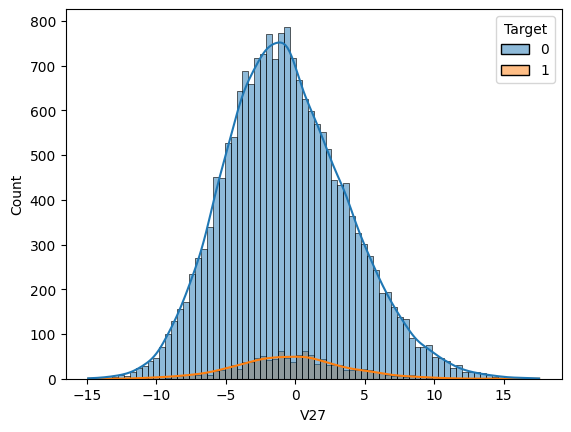

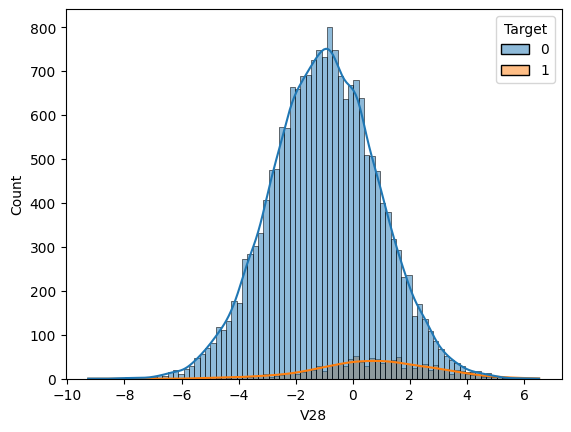

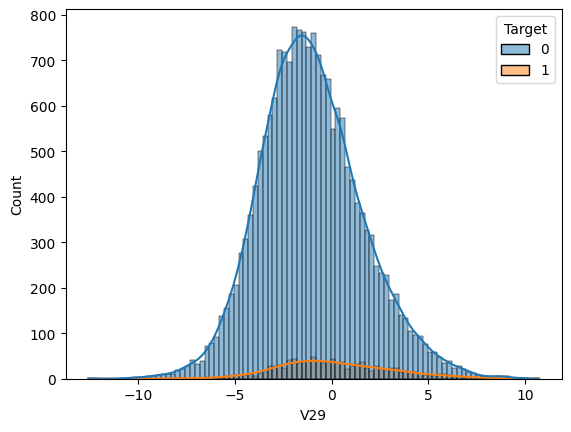

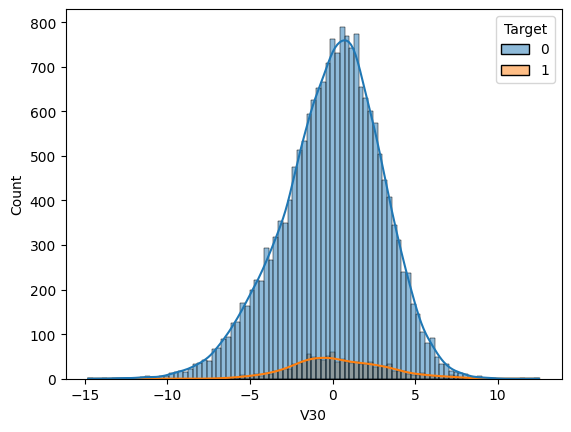

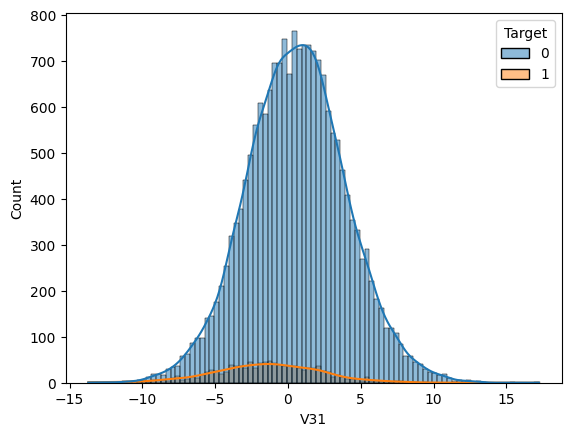

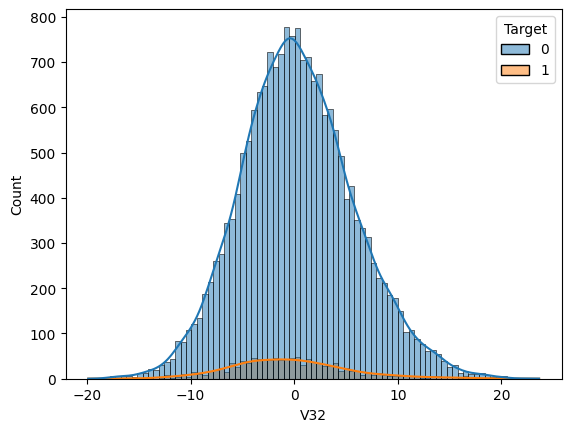

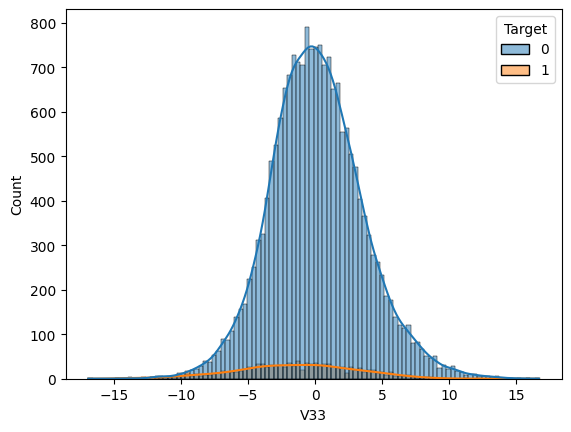

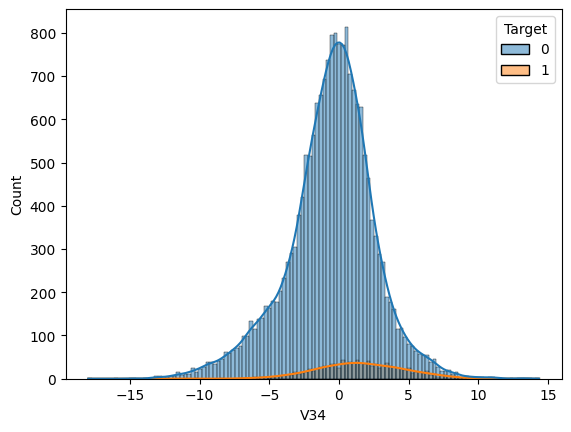

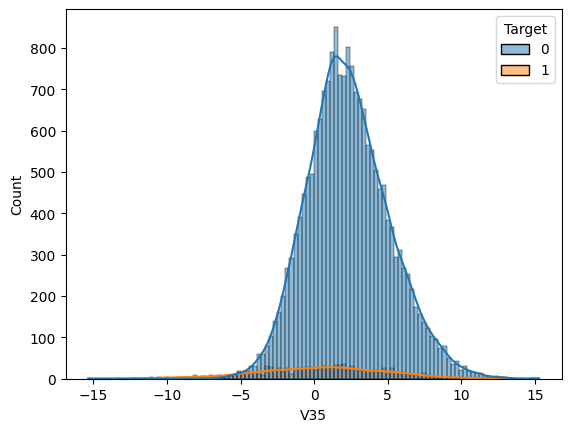

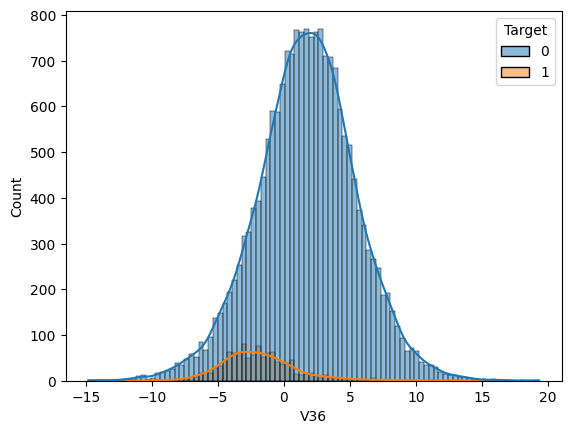

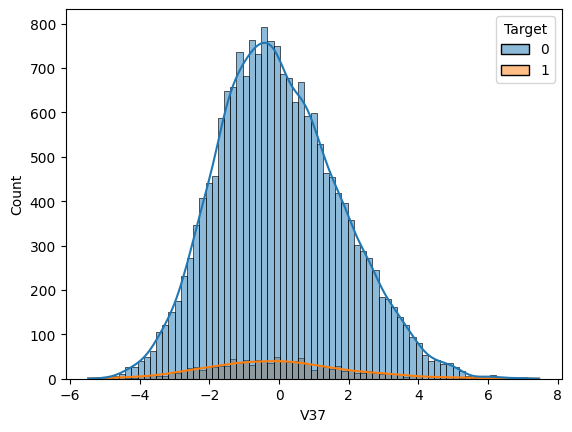

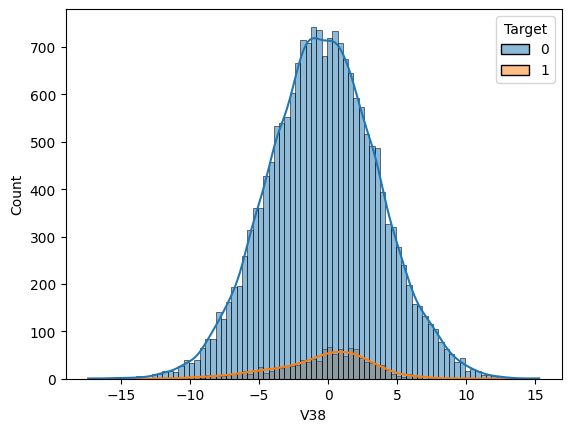

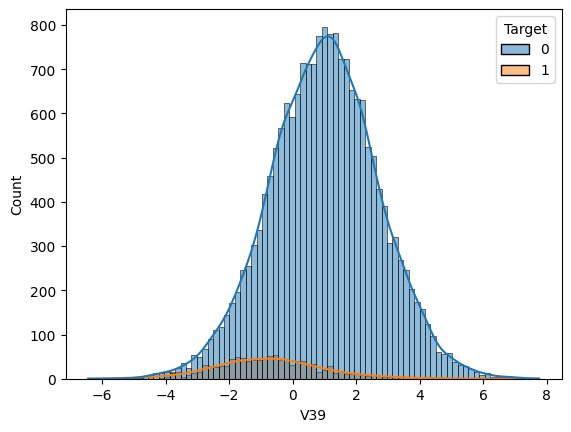

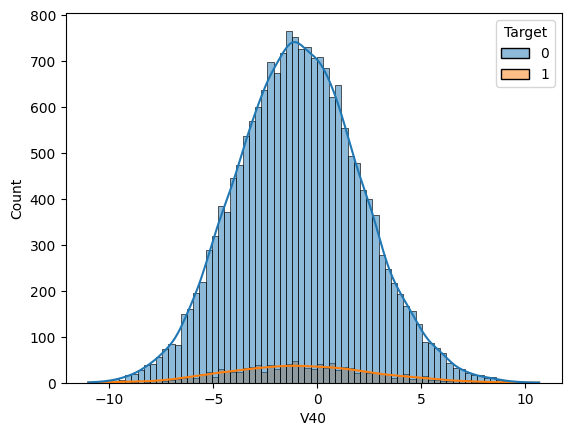

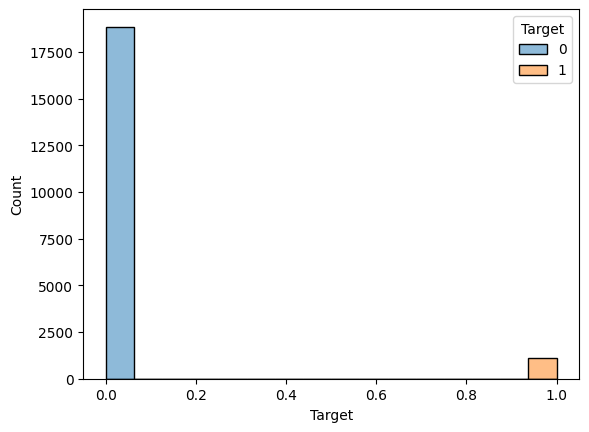

In [96]:
for col in df.columns:
  sns.histplot(data=df, hue='Target', x=col, kde=True);
  plt.show()


## Bivariate Analysis

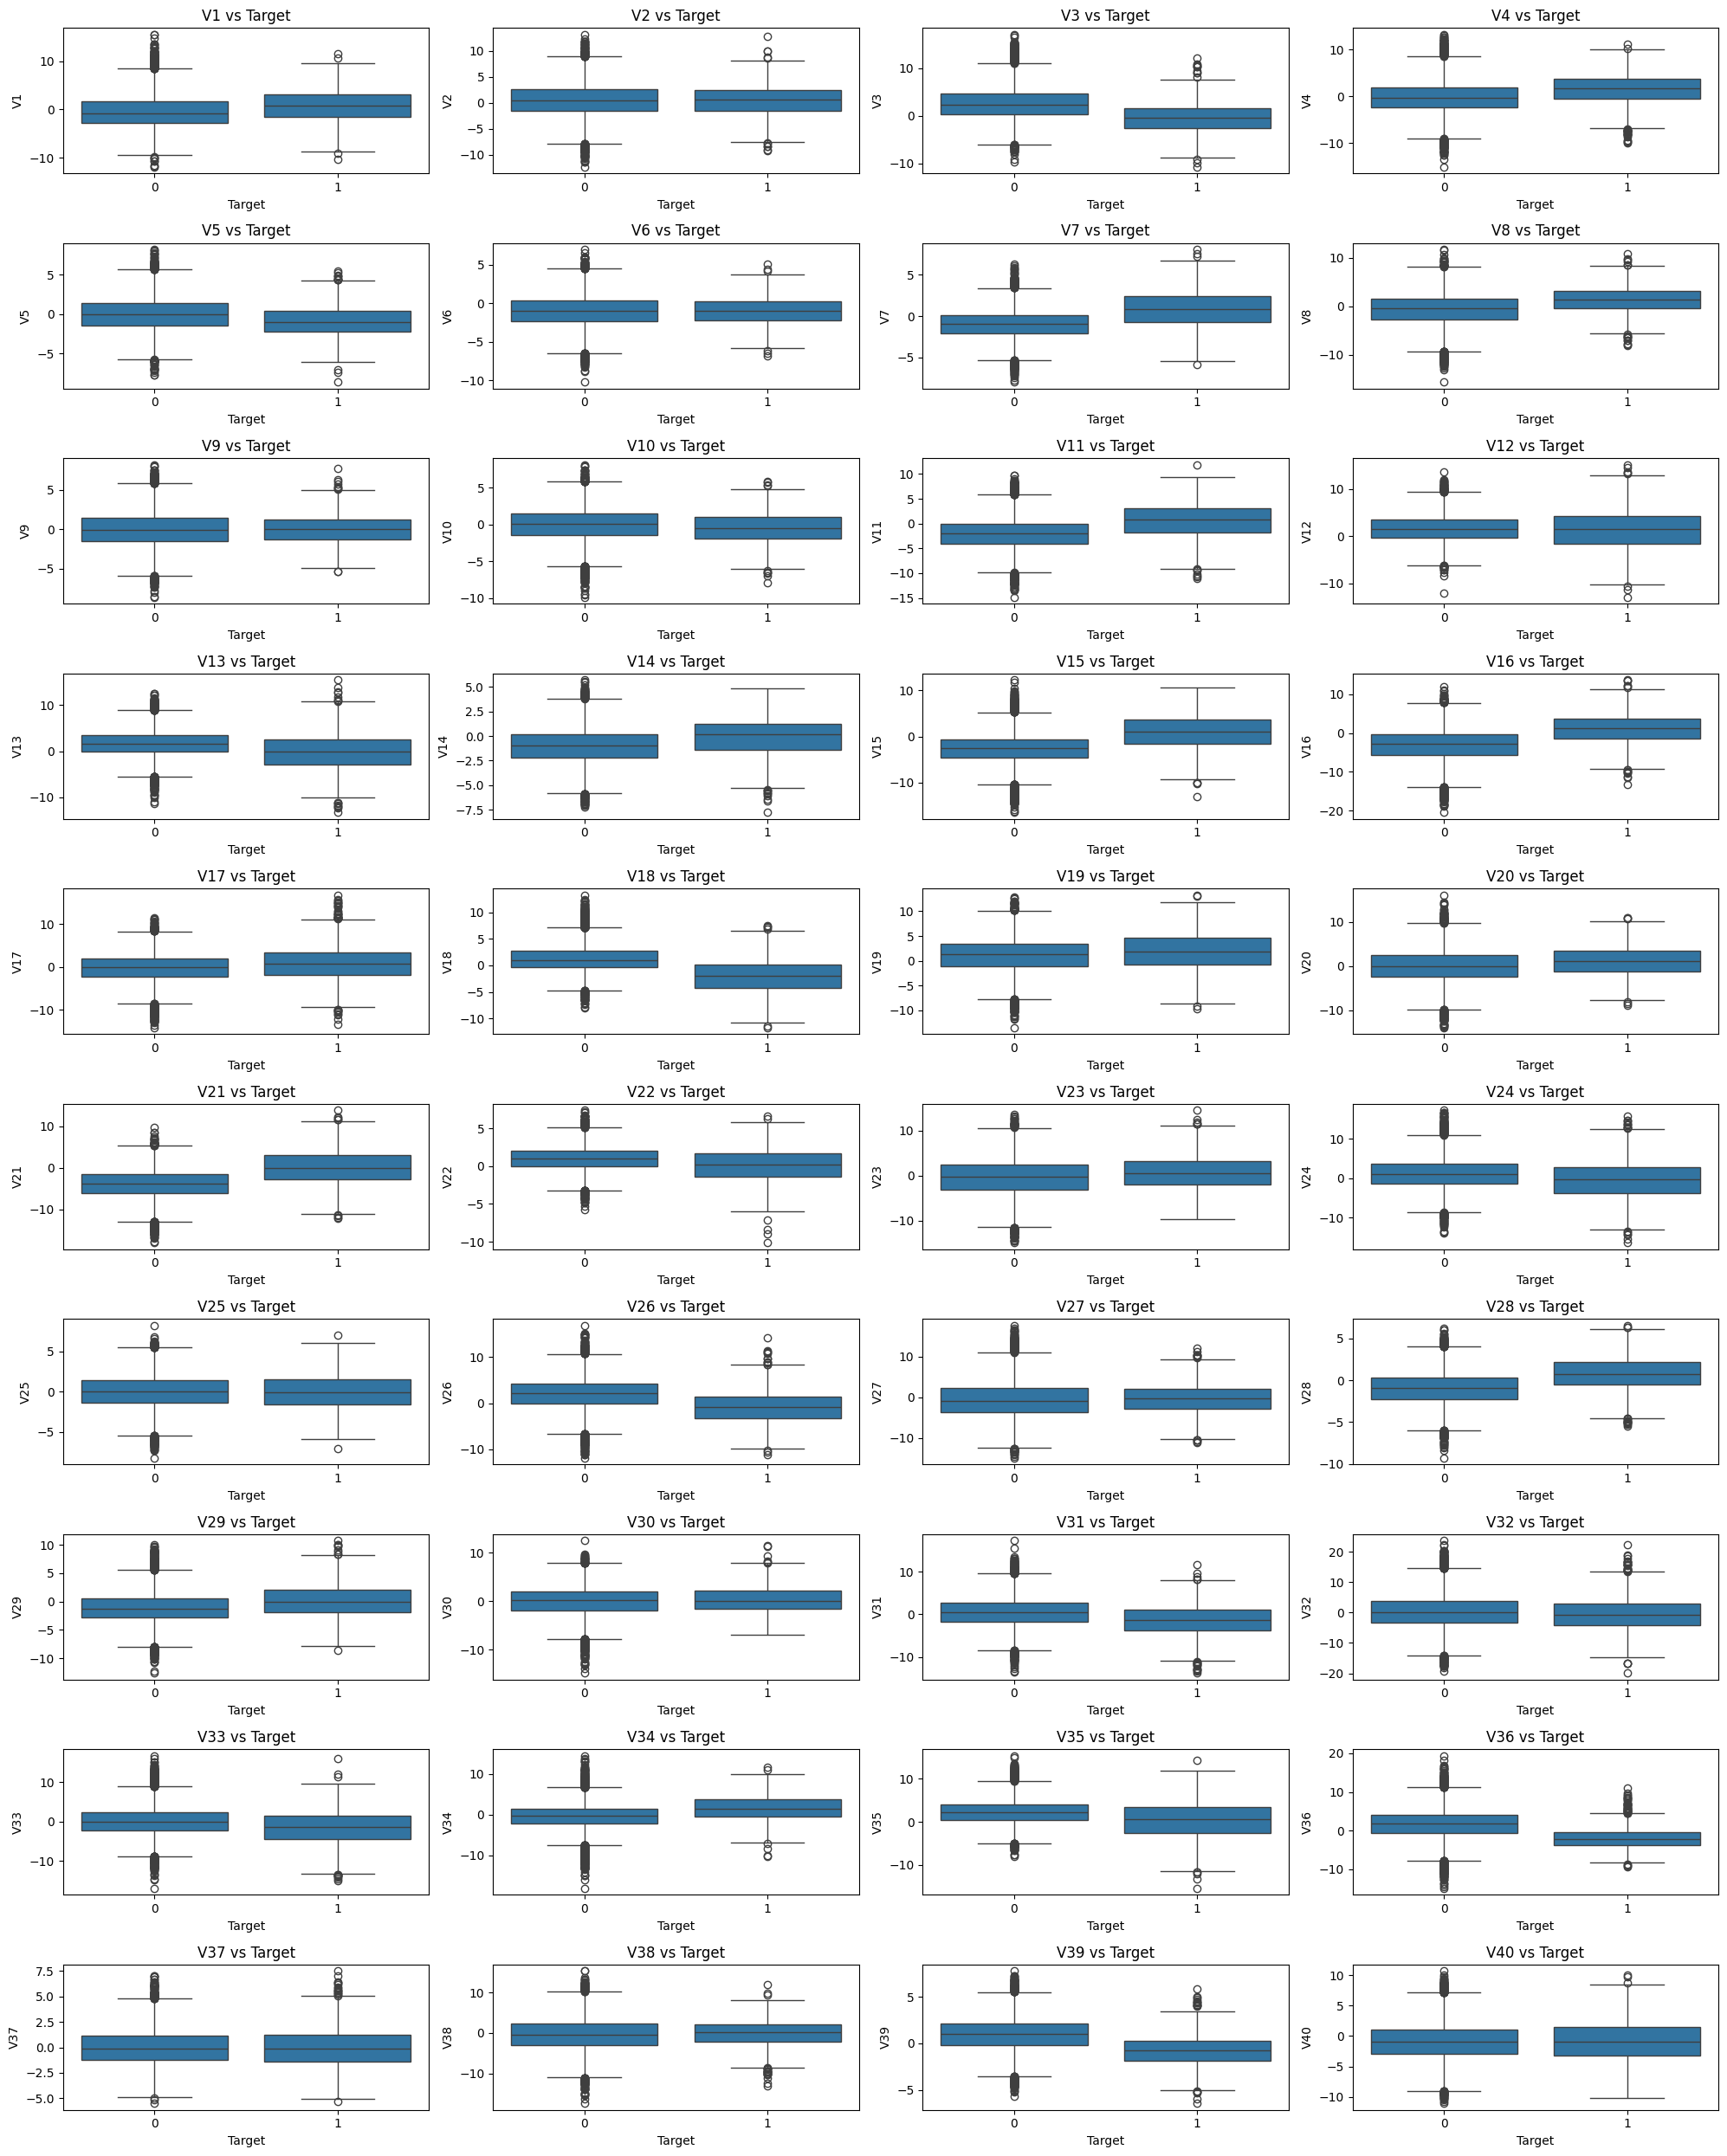

In [97]:
features = [f'V{i}' for i in range(1, 41)]  # V1 to V40

fig, axes = plt.subplots(10, 4, figsize=(20, 25))  # 10 rows × 4 cols = 40 plots
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x="Target", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Target")

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [17]:
df.shape

(19964, 41)

In [18]:
X=df.drop('Target',axis=1)
y=df['Target']

In [77]:
X_test=df_test.drop('Target',axis=1)
y_test=df_test['Target']

In [19]:
# Use train_test split to split the data (80% for training and 20% for testing)
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [20]:
print(y_train.value_counts(1))
print(y_val.value_counts(1))
print(X_train.shape)
print(X_val.shape)
#print(X_train.head())

Target
0    0.944399
1    0.055601
Name: proportion, dtype: float64
Target
0    0.944403
1    0.055597
Name: proportion, dtype: float64
(15971, 40)
(3993, 40)


On-hot encoding isnt really required since we have a binary data.

In [38]:
# Convert the target feature into a NumPy array using Keras to_categorical function
#y_train = to_categorical(y_train, 2)
#y_test_cat = to_categorical(y_val, 2)

In [21]:
y_train

,Target
5955,0
1420,0
5965,0
5566,0
5259,0
...,...
12426,0
9735,0
16074,0
10489,0


# **Model Building**

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

In [22]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

Our Problem

Target = 0 (no fault), 1 (fault)

False Negative (FN) = the model predicts 0 (no fault) but actually it’s 1 (fault).

That means: you miss a fault → the windmill runs faulty → repair cost is very high.

So, FN is very costly. Thus, we should optimize for Recall in this wind turbine fault detection case.

In [23]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate", "momentum","weight initializer","regularization","train accuracy","train recall","validation accuracy","val recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [24]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [25]:
num_classes = 1
batch_size = 32
epochs = 50

In [26]:
X_train.shape[1]

40

In [27]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model_0.add(Dense(1, activation="sigmoid"))   # single neuron, not num_classes

In [28]:
from tensorflow.keras import metrics
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [29]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9328 - loss: 0.1957 - recall: 0.4667 - val_accuracy: 0.9765 - val_loss: 0.0964 - val_recall: 0.6126
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0933 - recall: 0.6120 - val_accuracy: 0.9832 - val_loss: 0.0844 - val_recall: 0.7162
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0822 - recall: 0.6814 - val_accuracy: 0.9847 - val_loss: 0.0782 - val_recall: 0.7342
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.0725 - recall: 0.7172 - val_accuracy: 0.9867 - val_loss: 0.0747 - val_recall: 0.7793
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0669 - recall: 0.7662 - val_accuracy: 0.9875 - val_loss: 0.0721 - val_recall: 0.7928
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: 0.0636 - recall: 0.7853 - val_accuracy: 0.9867 - val_loss: 0.0698 - val_recall: 0.7838
Epoc

In [30]:
results.loc[0] = [1,[64],["relu"],50,32,"sgd","Default","-","xavier","-",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [31]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28


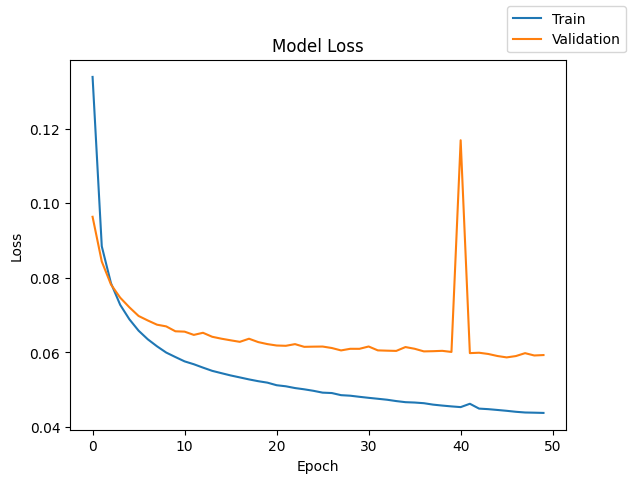

In [32]:
plot(history,'loss')

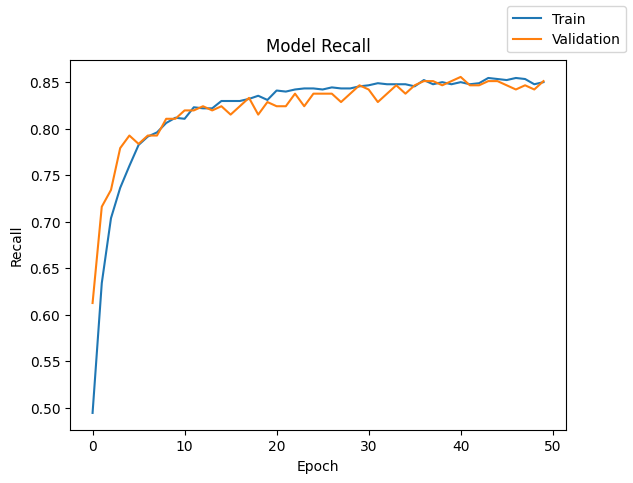

In [33]:
plot(history,'recall')

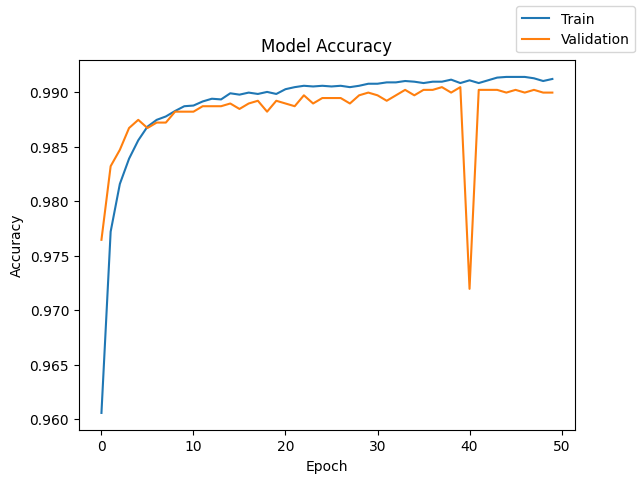

In [34]:
plot(history,'accuracy')

The model shows solid accuracy across training and validation sets, but recall scores are consistently low. Given that recall is our priority, further model tuning is necessary.

# **Model Performance Improvement**

## Model 1

In [35]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [36]:
#Initializing the neural network
# Adding two layer Neural Netowrk with more parameters
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(1,activation = 'sigmoid'))
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras import metrics
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [38]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9363 - loss: 0.1773 - recall: 0.3628 - val_accuracy: 0.9777 - val_loss: 0.0851 - val_recall: 0.6216
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0821 - recall: 0.6132 - val_accuracy: 0.9832 - val_loss: 0.0725 - val_recall: 0.7297
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0734 - recall: 0.7096 - val_accuracy: 0.9852 - val_loss: 0.0664 - val_recall: 0.7613
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0559 - recall: 0.7674 - val_accuracy: 0.9867 - val_loss: 0.0633 - val_recall: 0.8018
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0560 - recall: 0.8265 - val_accuracy: 0.9870 - val_loss: 0.0593 - val_recall: 0.7973
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0502 - recall: 0.8247 - val_accuracy: 0.9870 - val_loss: 0.0573 - val_recall: 0.7973
Epoc

In [39]:
results.loc[1] = [2,[128,64],["relu","tanh","sigmoid"],50,32,"sgd","Default","-","xavier","-",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [40]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28
1,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,-,xavier,-,0.994052,0.903153,0.991235,0.864865,58.85


## Model 2

In [41]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [42]:
#Initializing the neural network
# Adding two layer Neural Netowrk with momentum
model_2 = Sequential()
model_2.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_2.add(Dense(64,activation="tanh"))
model_2.add(Dense(1,activation = 'sigmoid'))
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
mom = 0.9    # defining the momentum value to be used
optimizer = keras.optimizers.SGD(momentum=mom)    # defining the SGD optimizer with a specific momentum
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [44]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9566 - loss: 0.1288 - recall: 0.5170 - val_accuracy: 0.9887 - val_loss: 0.0575 - val_recall: 0.8243
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0465 - recall: 0.8260 - val_accuracy: 0.9900 - val_loss: 0.0503 - val_recall: 0.8423
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0414 - recall: 0.8501 - val_accuracy: 0.9902 - val_loss: 0.0494 - val_recall: 0.8559
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0402 - recall: 0.8628 - val_accuracy: 0.9905 - val_loss: 0.0475 - val_recall: 0.8649
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0400 - recall: 0.8749 - val_accuracy: 0.9910 - val_loss: 0.0455 - val_recall: 0.8604
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0331 - recall: 0.8993 - val_accuracy: 0.9915 - val_loss: 0.0462 - val_recall: 0.8784
Epoc

In [45]:
results.loc[2] = [2,[128,64],["relu","tanh","sigmoid"],50,32,"sgd","Default","0.9","xavier","-",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [46]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28
1,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,-,xavier,-,0.994052,0.903153,0.991235,0.864865,58.85
2,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,0.9,xavier,-,0.997683,0.960586,0.989732,0.878378,66.92


## Model 3

In [47]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [48]:
#Initializing the neural network
# Adding two layer Neural Netowrk with momentum
model_3 = Sequential()
model_3.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_3.add(Dense(64,activation="tanh"))
model_3.add(Dense(1,activation = 'sigmoid'))
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#mom = 0.9    # defining the momentum value to be used
from tensorflow.keras import metrics
optimizer = keras.optimizers.Adam(learning_rate=1e-3) # defining the Adma optimizer with LR 1e-3
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [52]:

start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9580 - loss: 0.1216 - recall: 0.5233 - val_accuracy: 0.9890 - val_loss: 0.0522 - val_recall: 0.8198
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0521 - recall: 0.8198 - val_accuracy: 0.9900 - val_loss: 0.0484 - val_recall: 0.8468
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9922 - loss: 0.0386 - recall: 0.8723 - val_accuracy: 0.9907 - val_loss: 0.0459 - val_recall: 0.8514
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0387 - recall: 0.8614 - val_accuracy: 0.9907 - val_loss: 0.0463 - val_recall: 0.8514
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9917 - loss: 0.0393 - recall: 0.8784 - val_accuracy: 0.9915 - val_loss: 0.0451 - val_recall: 0.8694
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0329 - recall: 0.8959 - val_accuracy: 0.9917 - val_loss: 0.0449 - val_recall: 0.8784
Epoc

In [53]:
results.loc[3] = [2,[128,64],["relu","tanh","sigmoid"],50,32,"Adam","1e-3","-","xavier","-",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [54]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28
1,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,-,xavier,-,0.994052,0.903153,0.991235,0.864865,58.85
2,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,0.9,xavier,-,0.997683,0.960586,0.989732,0.878378,66.92
3,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-3,-,xavier,-,0.996243,0.939189,0.990233,0.869369,67.86


## Model 4

In [55]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [56]:
#Initializing the neural network
# Adding two layer Neural Netowrk with momentum
model_4 = Sequential()
model_4.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_4.add(Dense(64,activation="tanh"))
model_4.add(Dense(1,activation = 'sigmoid'))
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4) # defining the Adma optimizer with LR 1e-3
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [58]:

start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9376 - loss: 0.2088 - recall: 0.0765 - val_accuracy: 0.9742 - val_loss: 0.0901 - val_recall: 0.5405
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0852 - recall: 0.5906 - val_accuracy: 0.9840 - val_loss: 0.0706 - val_recall: 0.7207
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0652 - recall: 0.7303 - val_accuracy: 0.9870 - val_loss: 0.0633 - val_recall: 0.7838
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0582 - recall: 0.7795 - val_accuracy: 0.9877 - val_loss: 0.0593 - val_recall: 0.8018
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9887 - loss: 0.0508 - recall: 0.8117 - val_accuracy: 0.9885 - val_loss: 0.0565 - val_recall: 0.8153
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9878 - loss: 0.0552 - recall: 0.8075 - val_accuracy: 0.9885 - val_loss: 0.0539 - val_recall: 0.8108
Epoc

In [59]:
results.loc[4] = [2,[128,64],["relu","tanh","sigmoid"],50,32,"Adam","1e-4","-","xavier","-",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [60]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28
1,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,-,xavier,-,0.994052,0.903153,0.991235,0.864865,58.85
2,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,0.9,xavier,-,0.997683,0.960586,0.989732,0.878378,66.92
3,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-3,-,xavier,-,0.996243,0.939189,0.990233,0.869369,67.86
4,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-4,-,xavier,-,0.994803,0.912162,0.991485,0.873874,65.46


## Model 5

In [61]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [62]:
#Initializing the neural network
# Adding two layer Neural Netowrk with momentum
dropout_rate = 0.3
model_5 = Sequential()
model_5.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_5.add(Dropout(dropout_rate))
model_5.add(Dense(64,activation="tanh"))
model_5.add(Dense(1,activation = 'sigmoid'))
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4) # defining the Adma optimizer with LR 1e-3
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [64]:

start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8791 - loss: 0.2941 - recall: 0.1649 - val_accuracy: 0.9627 - val_loss: 0.1097 - val_recall: 0.3378
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1157 - recall: 0.4092 - val_accuracy: 0.9752 - val_loss: 0.0853 - val_recall: 0.5811
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9724 - loss: 0.0879 - recall: 0.5463 - val_accuracy: 0.9812 - val_loss: 0.0745 - val_recall: 0.6892
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0845 - recall: 0.6019 - val_accuracy: 0.9845 - val_loss: 0.0689 - val_recall: 0.7387
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9794 - loss: 0.0755 - recall: 0.6862 - val_accuracy: 0.9865 - val_loss: 0.0643 - val_recall: 0.7793
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0675 - recall: 0.7156 - val_accuracy: 0.9867 - val_loss: 0.0614 - val_recall: 0.7838
Epoc

In [65]:
results.loc[5] = [2,[128,64],["relu","tanh","sigmoid"],50,32,"Adam","1e-4","-","xavier","drop out:0.3",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [66]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28
1,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,-,xavier,-,0.994052,0.903153,0.991235,0.864865,58.85
2,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,0.9,xavier,-,0.997683,0.960586,0.989732,0.878378,66.92
3,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-3,-,xavier,-,0.996243,0.939189,0.990233,0.869369,67.86
4,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-4,-,xavier,-,0.994803,0.912162,0.991485,0.873874,65.46
5,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-4,-,xavier,drop out:0.3,0.992549,0.884009,0.991485,0.864865,66.79


## Model 6

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [71]:
#Initializing the neural network
# Adding two layer Neural Netowrk with momentum
dropout_rate = 0.3
model_6 = Sequential()
model_6.add(Dense(128,activation="relu",kernel_initializer='he_normal',input_dim = X_train.shape[1]))
model_6.add(BatchNormalization())
model_6.add(Dropout(dropout_rate))
model_6.add(Dense(64,activation="tanh"))
model_1.add(BatchNormalization())
model_6.add(Dense(1,activation = 'sigmoid'))
model_6.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [72]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4) # defining the Adma optimizer with LR 1e-3
model_6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[metrics.Recall(name="recall"), "accuracy"])

In [73]:

start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=100)
end=time.time()

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6229 - loss: 0.6806 - recall: 0.4841 - val_accuracy: 0.9447 - val_loss: 0.2985 - val_recall: 0.7297
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8964 - loss: 0.3405 - recall: 0.6525 - val_accuracy: 0.9782 - val_loss: 0.1423 - val_recall: 0.7027
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9549 - loss: 0.1939 - recall: 0.6387 - val_accuracy: 0.9812 - val_loss: 0.0901 - val_recall: 0.6802
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1340 - recall: 0.6057 - val_accuracy: 0.9832 - val_loss: 0.0718 - val_recall: 0.7072
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0998 - recall: 0.6446 - val_accuracy: 0.9842 - val_loss: 0.0662 - val_recall: 0.7207
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0913 - recall: 0.6534 - val_accuracy: 0.9865 - val_loss: 0.0619 - val_recall: 0.761

In [74]:
results.loc[6] = [2,[128,64],["relu","tanh","sigmoid"],100,32,"Adam","1e-4","-","He","Batch Normalization: Drop out:0.3",history.history["accuracy"][-1],history.history["recall"][-1],history.history["val_accuracy"][-1],history.history["val_recall"][-1],round(end-start,2)]

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [76]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning rate,momentum,weight initializer,regularization,train accuracy,train recall,validation accuracy,val recall,time (secs)
0,1,[64],[relu],50,32,sgd,Default,-,xavier,-,0.991234,0.850225,0.989982,0.851351,55.28
1,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,-,xavier,-,0.994052,0.903153,0.991235,0.864865,58.85
2,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,sgd,Default,0.9,xavier,-,0.997683,0.960586,0.989732,0.878378,66.92
3,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-3,-,xavier,-,0.996243,0.939189,0.990233,0.869369,67.86
4,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-4,-,xavier,-,0.994803,0.912162,0.991485,0.873874,65.46
5,2,"[128, 64]","[relu, tanh, sigmoid]",50,32,Adam,1e-4,-,xavier,drop out:0.3,0.992549,0.884009,0.991485,0.864865,66.79
6,2,"[128, 64]","[relu, tanh, sigmoid]",100,32,Adam,1e-4,-,He,Batch Normalization: Drop out:0.3,0.992612,0.886261,0.991736,0.873874,131.91


Now, let's check the performance of the final model on the test set.

In [101]:
# Predicting on Test data
y_pred=model_6.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


In [102]:
# Applying the argmax function
y_pred_final = (y_pred >= 0.5).astype(int)

In [103]:
# Classification report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4718
           1       0.98      0.86      0.92       282

    accuracy                           0.99      5000
   macro avg       0.99      0.93      0.96      5000
weighted avg       0.99      0.99      0.99      5000



# **Actionable Insights and Recommendations**

Class 0 (No failure)

Precision = 0.99 → Almost all predicted "no failures" are correct.
Recall = 1.00 → We’re catching nearly every "no failure" correctly.
F1 = 1.00

Class 1 (Failure)

Precision = 0.98 → Only ~2% of your predicted failures are false alarms (good, keeps inspection costs low).
Recall = 0.86 → We're catching 86% of actual failures. But 14% of true failures are being missed (FN) → this is where replacement cost comes in.
F1 = 0.92

Overall (accuracy) = 0.99 → Looks great, but accuracy is misleading here because class 0 dominates (4718 vs 282).

Business Interpretation

Strengths:
✅ Very high precision (few wasted inspections).
✅ Very high accuracy (model is stable and consistent).

Weakness:
❌ Recall for failures (0.86) means 14% of failures are missed → those generators will break down and incur expensive replacement costs.

In [108]:
!cp "/content/drive/MyDrive/Python_Course/INN_ReneWind_Main_Project_FullCode_Notebook.ipynb" .

In [109]:
!jupyter nbconvert --to html INN_ReneWind_Main_Project_FullCode_Notebook.ipynb


[NbConvertApp] Converting notebook INN_ReneWind_Main_Project_FullCode_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 46 image(s).
[NbConvertApp] Writing 2772291 bytes to INN_ReneWind_Main_Project_FullCode_Notebook.html


In [111]:
from google.colab import files
files.download('INN_ReneWind_Main_Project_FullCode_Notebook.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>